<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
#Write code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [2]:
# Load the data
data = pd.read_csv('HR_comma_sep.csv')
df = data.copy()

In [3]:
# Find the shape
df.shape

(14999, 10)

In [4]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Find the null values
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

3571


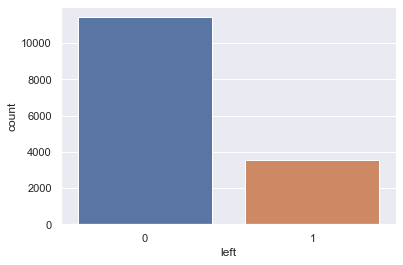

In [8]:
# Count of how many employees left the company
print(df["left"].sum())
sns.countplot(x='left'  , data=df);

**Question:What can you interpret from the plot above?** 

Answer: 3571 employees have left the company. Total number of employees is around 11000 and the turn over ratio is around 25% as seen from the plot.

**Task 3: Find out the number of projects being handled.**

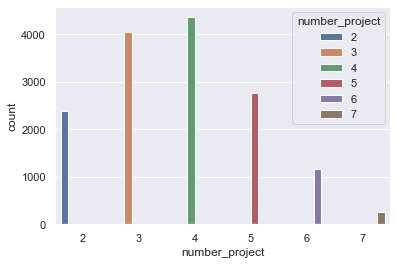

In [9]:
# Write code here
df["number_project"].sum()

#print(df['number_project'].value_counts() )
sns.countplot(x='number_project' , hue='number_project' , data=df);

**Question: What insights can you infer from the above plot?**

Answer: Most of the employees are handling 4 projects in total. Very few emplyees are handling 6 and 7 projects.  

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

In [10]:
print(df.groupby('left')['number_project'].sum())#.reset_index() )

left
0    43274
1    13768
Name: number_project, dtype: int64


**Task 5:** Make a plot of your findings (only turn-over employees)

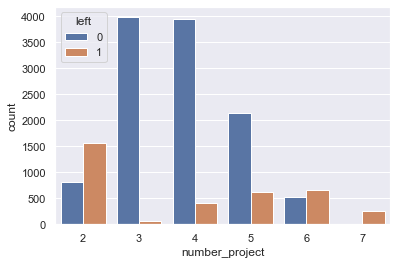

In [11]:
sns.countplot(x='number_project' , hue='left' , data=df);

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer:The maximum turnover we can see is for the employees assigned only 2 projects. Reason can be lack of growth opporunities and work for such employees that eventually lead them to leave the company.

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64


Text(0, 0.5, 'Number of Employees')

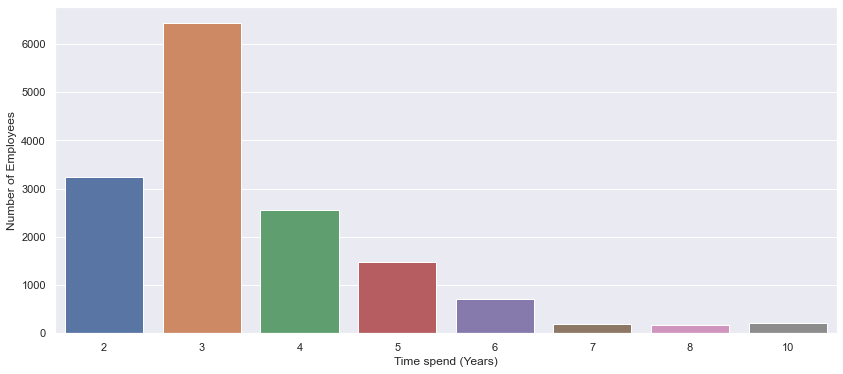

In [12]:
print( df['time_spend_company'].value_counts() )
plt.figure(figsize=(14,6))
sns.countplot(x='time_spend_company' , data=df);
plt.xlabel('Time spend (Years)')
plt.ylabel('Number of Employees')

**Question: What is the maximum number of time spend by the employees?**

Answer: 10 years is the maximum time spent by any emplyee in the company. 

In [13]:
# Write the code here to get the percentage of employees leaving.
df['left'].value_counts(normalize=True).reset_index(name='percent')

,index,percent
0,0,0.761917
1,1,0.238083


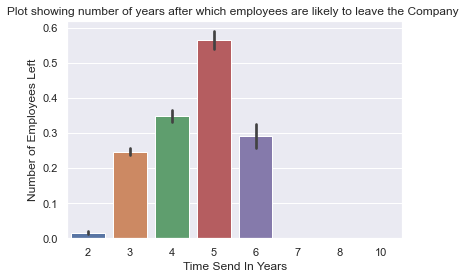

In [14]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
sns.barplot(x='time_spend_company' , y='left' , data=df);
plt.xlabel('Time Send In Years')
plt.ylabel('Number of Employees Left')
plt.title('Plot showing number of years after which employees are likely to leave the Company ');

**Question: After what time period are employees most likely to leave the company ?**

Answer: From the plot above most of the employees leave the company after spending 5 years.

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

0    12830
1     2169
Name: Work_accident, dtype: int64


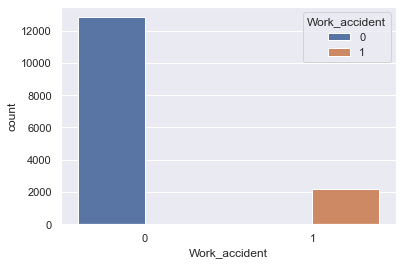

In [15]:
# Number of employees involved in work accident
print ( df['Work_accident'].value_counts() )
sns.countplot(x='Work_accident' , hue='Work_accident', data=df );

**Question: What can you conclude from the graph above?**

Answer: 2169 emplyees are involved in a work accident and 12830 arent involved in any accident. 

In [16]:
# Number of employees involved in work accident and left or not left
print ( df.groupby('left')['Work_accident'].value_counts() )

left  Work_accident
0     0                9428
      1                2000
1     0                3402
      1                 169
Name: Work_accident, dtype: int64


## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [17]:
# Write code here
print ( df.groupby('promotion_last_5years')['left'].value_counts() )

promotion_last_5years  left
0                      0       11128
                       1        3552
1                      0         300
                       1          19
Name: left, dtype: int64


Answer: 319 employees got promotion in the last 5 years and out of which 19 employees left the company.

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


Text(0.5, 1.0, 'Salary Trend of Employees')

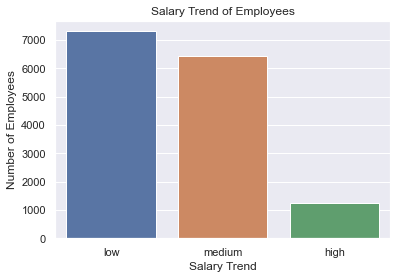

In [18]:
#Write code here
print( df['salary'].value_counts() )
sns.countplot(x='salary' , data=df);
plt.xlabel('Salary Trend')
plt.ylabel('Number of Employees')
plt.title('Salary Trend of Employees')

Answer: Majoritiy of the employees are in the low salary range (7316) and medium salary range (6446) whereas very less are in the high salary range (1237).  

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [19]:
# Write code here
df.groupby(['left'])['salary'].value_counts(normalize=True).reset_index(name='percent') 

,left,salary,percent
0,0,low,0.450123
1,0,medium,0.448810
2,0,high,0.101068
3,1,low,0.608233
4,1,medium,0.368804
5,1,high,0.022963


Text(0, 0.5, 'Percent of Employees left')

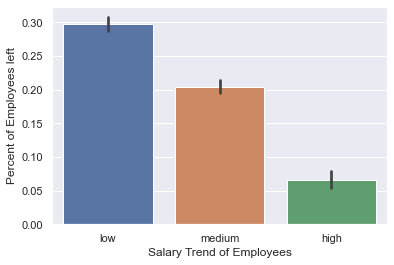

In [20]:
# Write code here for plot
sns.barplot(x='salary' , y='left',  data=df);
plt.xlabel('Salary Trend of Employees')
plt.ylabel('Percent of Employees left')

**Question: What does the above plot show?**

Answer: Most of the employees in the Low and Medium salary ranges are likely to leave the company due to unsatifactory wages.

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64


Text(0, 0.5, 'Number of Employees left')

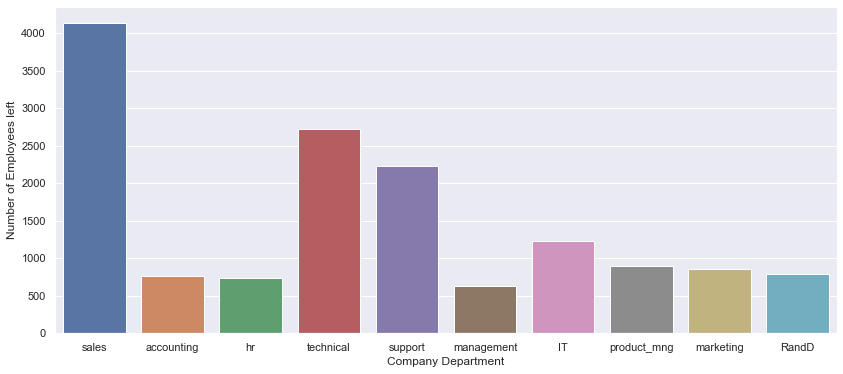

In [21]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.

print( df['dept'].value_counts())
plt.figure(figsize=(14,6))
sns.countplot(x='dept' , data=df);
plt.xlabel('Company Department')
plt.ylabel('Number of Employees left')

**Question: Which department has maximum number of employees?**

Answer:Sales have the maximum number of emplyees (4140)

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

Text(0, 0.5, 'Parcent of Employees left the Company')

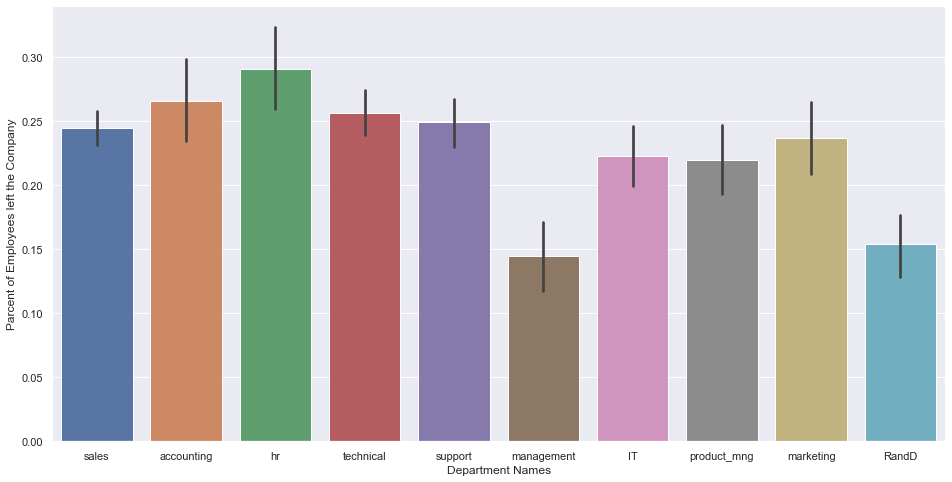

In [22]:
# Write code here
plt.figure(figsize=(16,8))
sns.barplot(x='dept' , y='left',  data=df);
plt.xlabel('Department Names')
plt.ylabel('Parcent of Employees left the Company')

Text(0, 0.5, 'Number of Employees left the Company')

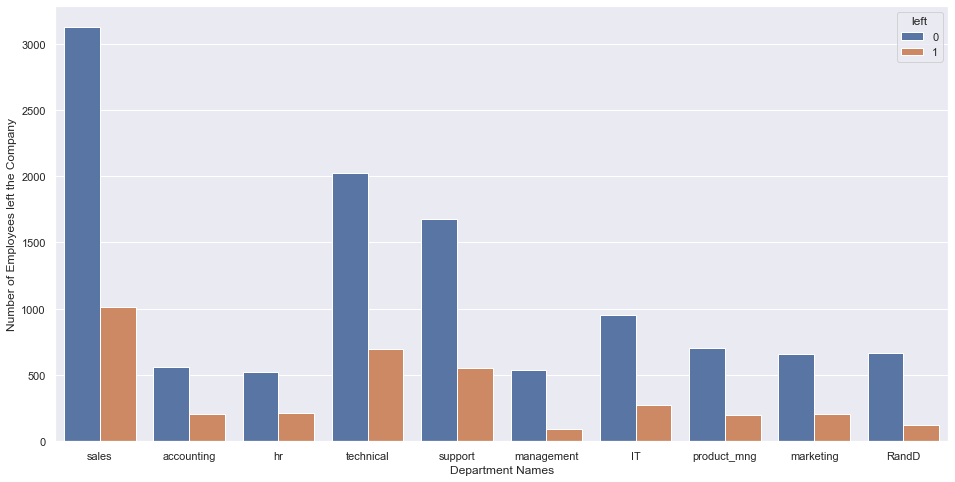

In [23]:
# Write code here to draw the plot
plt.figure(figsize=(16,8))
sns.countplot(x='dept' , hue='left', data=df );
plt.xlabel('Department Names')
plt.ylabel('Number of Employees left the Company')

Answer: Sales department has the Maximum number of employees leaving the company where as hr has the maximum percentage of turn over rates.

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

Text(0, 0.5, 'Satisfaction Level')

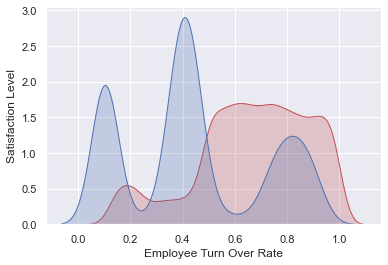

In [24]:
# Write the code here
df1=df.loc[(df['left']==0) , 'satisfaction_level']
df2=df.loc[(df['left']==1) , 'satisfaction_level']

ax=sns.kdeplot(df1, color='r', shade= True );
ax=sns.kdeplot(df2, color='b' ,  shade = True ) ;
plt.xlabel("Employee Turn Over Rate")
plt.ylabel("Satisfaction Level")

**Question: What can you conclude from the plot above?**

Answer: The employees turn over who's satisfaction level is above 1.7 are very likely to not turn over while employee's whose satisfaction level is below 1.6 are very likely to turn over.

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [25]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type']= ''

df.loc[df['satisfaction_level'] >=0.5 , 'satisfaction_level_type']= df.loc[df['satisfaction_level'] >=0.5 , 'satisfaction_level_type'].replace('' , 'High')
df.loc[df['satisfaction_level'] <0.5 , 'satisfaction_level_type']= df.loc[df['satisfaction_level'] < 0.5 , 'satisfaction_level_type'].replace('' , 'Low')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

Text(0, 0.5, 'Number of Employees')

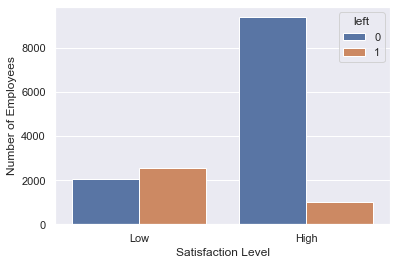

In [26]:
# Write Code Here
#plt.figure(figsize=(12,6))
sns.countplot(x="satisfaction_level_type" , hue='left' , data=df);
plt.xlabel('Satisfaction Level')
plt.ylabel("Number of Employees")

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [27]:
# Write Code Here
df.groupby('satisfaction_level_type')['number_project'].mean().reset_index()

,satisfaction_level_type,number_project
0,High,3.814324
1,Low,3.777438


**Make a Plot of your findings**

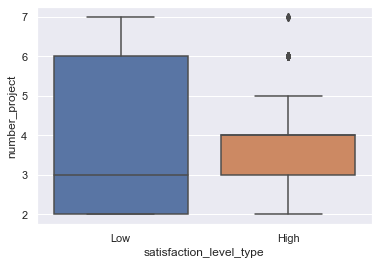

In [28]:
sns.boxplot(x='satisfaction_level_type' , y='number_project'  , data=df);

**Question:** What did you infer from the above plot

**Answer:** The satisfaction level type for employees handling 3-4 projects is high and these employees were less likely to leave the company whereas satisfaction level type of employees dealing with 2,5 or 6 projects have low satisfaction levels and are very likely to leave the company.

Now lets check number of projects for low satisfaction level

In [29]:
# Write Code Here
df.groupby('satisfaction_level_type')['number_project'].value_counts()

satisfaction_level_type  number_project
High                     4                 3807
                         3                 3504
                         5                 2281
                         2                  591
                         6                  228
                         7                    5
Low                      2                 1797
                         6                  946
                         4                  558
                         3                  551
                         5                  480
                         7                  251
Name: number_project, dtype: int64

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [30]:
df['employee_type']=''
df.loc[df['number_project'] == 2 , 'employee_type']=df.loc[df['number_project']==2 , 'employee_type'].replace('' , 'Unburdened')
df.loc[(df['number_project'] >= 3) & (df['number_project'] <=5) , 'employee_type']=df.loc[(df['number_project'] >= 3) & (df['number_project'] <=5) , 'employee_type'].replace('' , 'Satisfactory') 
df.loc[df['number_project'] >=6  , 'employee_type']=df.loc[df[ 'number_project'] >= 6 , 'employee_type'].replace('' , 'Burdened')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,Unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,Burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,Satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,Unburdened


In [31]:
# Write code here
df['employee_type'].value_counts().reset_index()

,index,employee_type
0,Satisfactory,11181
1,Unburdened,2388
2,Burdened,1430


**Task 15: Make a countplot to see which type of employee is leaving**

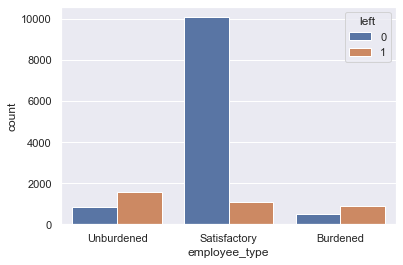

In [32]:
# Write code here
sns.countplot(x='employee_type' , hue='left' , data=df);

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [33]:
# Write code here
df[['satisfaction_level_type' , 'employee_type']].head()

,satisfaction_level_type,employee_type
0,Low,Unburdened
1,High,Satisfactory
2,Low,Burdened
3,High,Satisfactory
4,Low,Unburdened


# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [34]:
# Write code here
df_OneHot=pd.get_dummies(df,columns=['dept' , 'salary' , 'satisfaction_level_type' , 'employee_type'])
df_OneHot.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_Unburdened
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


**Task 17: Creating Independant and Dependant Variables**

In [35]:
df=df_OneHot.copy()

In [36]:
# Write code here
X=df.drop(['left'] , axis=1 )
Y=df[['left']]

**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#Write code here
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size=0.30 , random_state = 100 , shuffle=True )

In [39]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 25) (10499, 1)
(4500, 25) (4500, 1)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [40]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Making instance and training the model
clf_rf = RandomForestClassifier(random_state=100)
clf_rf.fit(xtrain,ytrain)

C:\Users\Warda Shafiq\AppData\Local\Temp\ipykernel_14124\1770197474.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(xtrain,ytrain)


RandomForestClassifier(random_state=100)

In [42]:
# Get predictions
rf_pred=clf_rf.predict(xtest)
rf_pred_prb=clf_rf.predict_proba(xtest)[: , 1]

**Precision**

In [43]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [44]:
#Write the code to calculate
rf_precision= precision_score(ytest , rf_pred)
print("Precision : {}".format(rf_precision) )

Precision : 0.9916666666666667


**Accuracy**

In [45]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [46]:
# Write the code to calculate
rf_acc=accuracy_score(ytest , rf_pred)
print("Accuracy : {}".format(rf_acc))

Accuracy : 0.9917777777777778


**Recall**

In [47]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [48]:
# Write the code to calculate
rf_recall=recall_score(ytest , rf_pred)
print(" Recall : {} ".format(rf_recall) )

 Recall : 0.9745222929936306 


**F1-Score**

In [49]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [50]:
# Write the code to calculate
rf_f1_score= f1_score(ytest , rf_pred)
print(" F1_Score : {}".format(rf_f1_score))

 F1_Score : 0.9830197338228546


**Classification Report**

In [51]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [52]:
#Write the code to calculate
print (classification_report(ytest , rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.99      0.97      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



## Logistic Regression

In [53]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [54]:
# Create instance and train, random _state=100
lr_model=LogisticRegression(random_state=100)
lr_model.fit(xtrain , ytrain)

C:\Users\Warda Shafiq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Warda Shafiq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [55]:
# get the predictions
lr_pred=lr_model.predict(xtest)
lr_pred[0:8]

array([0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

**Accuracy**

In [56]:
from sklearn.metrics import confusion_matrix
print ("\n Confusion Matrix  is \n\n" , confusion_matrix(ytest ,lr_pred) ) 
 
print(" \n Confusion Matrix by .ravel() method \n \n " , confusion_matrix(ytest , lr_pred ).ravel() )

tn , fp , fn , tp = confusion_matrix(ytest , lr_pred).ravel()

conf_matrix = pd.DataFrame({ "Pred Left" :[tp , fp] , "pred not_left" :[fn , tn] } , index=[ "Left " , "Not Left"  ])
conf_matrix


 Confusion Matrix  is 

 [[3154  247]
 [ 352  747]]
 
 Confusion Matrix by .ravel() method 
 
  [3154  247  352  747]


,Pred Left,pred not_left
Left,747,352
Not Left,247,3154


In [57]:
#Write the code here
from sklearn.metrics import accuracy_score
lr_accuracy= accuracy_score(ytest, lr_pred)
print("The accuracy by Built-in Function is : {}".format(lr_accuracy))

print( "\n\n Calculated Accuracy\n ")
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

The accuracy by Built-in Function is : 0.8668888888888889


 Calculated Accuracy
 
Accuracy: 0.8668888888888889


**Precision**

In [58]:
#Write the code here
print("Calculate Precision"  )
precision_1 = tp /(tp + fp)
print("\n precision for 1 : {}".format(precision_1))
precision_0 = tn/(tn+fn)
print("\n precision for 0 : {}".format(precision_0))

Calculate Precision

 precision for 1 : 0.7515090543259557

 precision for 0 : 0.8996006845407872


In [59]:
lr_precision=precision_score(ytest , lr_pred)
print("Precision by built-in function : {}".format(lr_precision) )

Precision by built-in function : 0.7515090543259557


**Recall**

In [60]:
#Write the code here
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.6797088262056415
Recall for 0: 0.9273743016759777


In [61]:
lr_recall= recall_score(ytest, lr_pred)
print("Recall score by built-in function is: {}".format(lr_recall))

Recall score by built-in function is: 0.6797088262056415


**F1 Score**

In [62]:
#Write the code here
from sklearn.metrics import f1_score
lr_f1_score=f1_score(ytest , lr_pred)
print("F-1 score by built-in function is: {}".format(lr_f1_score))

F-1 score by built-in function is: 0.7138079311992357


**Classification Report**

In [63]:
#Write the code here
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3401
           1       0.75      0.68      0.71      1099

    accuracy                           0.87      4500
   macro avg       0.83      0.80      0.81      4500
weighted avg       0.86      0.87      0.86      4500



## Ada Boost

In [64]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [65]:
#Write the code here to make an instance and train the model with random state =100
clf_adb=AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain,ytrain)

C:\Users\Warda Shafiq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=100)

In [66]:
# Get the predictions
pred_clf_adb=clf_adb.predict(xtest)

**Accuracy**

In [67]:
#Write code here
ab_accuracy= accuracy_score(ytest,pred_clf_adb)
print(" Accuracy for AdaBoost is : {}".format(ab_accuracy))

 Accuracy for AdaBoost is : 0.9588888888888889


**Precision**

In [68]:
#Write code here
ab_precision= precision_score(ytest , pred_clf_adb)
print(" Precision for AdaBoost is : {}".format(ab_precision))

 Precision for AdaBoost is : 0.9147005444646098


**Recall**

In [69]:
#Write code here
ab_recall= recall_score(ytest , pred_clf_adb)
print(" Recall for AdaBoost is : {}".format(ab_recall))

 Recall for AdaBoost is : 0.9171974522292994


**F1-Score**

In [70]:
#Write code here
ab_f1_score=f1_score(ytest , pred_clf_adb)
print("f1 score for AdaBoost is: {}".format(ab_f1_score))

f1 score for AdaBoost is: 0.9159472966833256


**Classification Report**

In [71]:
#Write code here
print(classification_report(ytest, pred_clf_adb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3401
           1       0.91      0.92      0.92      1099

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



## XG Boost

In [72]:
#Write the code here to import the model
from xgboost import XGBClassifier

In [73]:
#Write the code here to make an instance and train the model with random state =100
clf_xgb = XGBClassifier(random_state=100)
clf_xgb.fit(xtrain , ytrain )

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
# Get the predictions
pred_clf_xgb=clf_xgb.predict(xtest)

**Accuracy**

In [75]:
#Write code here
xgb_accuracy= accuracy_score(ytest , pred_clf_xgb)
print(" Accuracy of XGB is : {}".format(xgb_accuracy) )

 Accuracy of XGB is : 0.9895555555555555


**Precision**

In [76]:
#Write code here
xgb_precision= precision_score(ytest , pred_clf_xgb)
print(" Precision of XGB is : {}".format(xgb_precision) )

 Precision of XGB is : 0.9879406307977736


**Recall**

In [77]:
#Write code here
xgb_recall= recall_score(ytest , pred_clf_xgb)
print(" Recall for XGB : {}".format(xgb_recall))

 Recall for XGB : 0.9690627843494085


**F1-Score**

In [78]:
#Write code here
xgb_f1_score=f1_score(ytest , pred_clf_xgb)
print(" F_1 score of XGBoost is :{}".format(xgb_f1_score) )

 F_1 score of XGBoost is :0.9784106568672484


**Classification Report**

In [79]:
#Write code here
print(classification_report(ytest, pred_clf_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.99      0.97      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [80]:
# Write the code here
comparison_dict = {"Algorithm": ["Random Forest", "Logistic Regression", "Ada Boost", "XGBoost"],
                   "Accuracy": [rf_acc, lr_accuracy, ab_accuracy ,xgb_accuracy],
                   "Precision": [rf_precision ,lr_precision, ab_precision ,xgb_precision ],
                   "Recall": [rf_recall, lr_recall , ab_recall ,xgb_recall],
                   "F1 Score": [rf_f1_score, lr_f1_score , ab_f1_score ,xgb_f1_score ]
                   }

In [81]:
comparison = pd.DataFrame(comparison_dict)
comparison 

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.991778,0.991667,0.974522,0.983020
1,Logistic Regression,0.866889,0.751509,0.679709,0.713808
2,Ada Boost,0.958889,0.914701,0.917197,0.915947
3,XGBoost,0.989556,0.987941,0.969063,0.978411


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: **Random Forest**